<a href="https://colab.research.google.com/github/givatop/AI-HAKATON/blob/main/%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B8%D1%81%D0%BF%D0%BE%D1%80%D1%87%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D0%BD%D0%BE%D1%80%D0%BC_%D1%84%D0%BE%D1%82%D0%BE_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Подключение нужных слоев из модуля tensorflow.keras.layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import optimizers

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Матрица ошибок классификатора
from PIL import Image # Отрисовка изображений
from sklearn.model_selection import train_test_split # Разделение на обучающую и проверочную/тестовую выборку

import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Отрисовка графиков
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

import os # Для работы с файлами
import random # Генерация случайных чисел
import gdown # Подключение модуля для загрузки данных из облака

In [ ]:
# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download('https://lodmedia.hb.bizmrg.com/case_files/1026328/train_dataset_altai.zip', None)

Downloading...
From: https://lodmedia.hb.bizmrg.com/case_files/1026328/train_dataset_altai.zip
To: /content/train_dataset_altai.zip
100%|██████████| 6.52G/6.52G [05:04<00:00, 21.4MB/s]


'train_dataset_altai.zip'

In [ ]:
# Разархивация датасета в директорию '/content'
!unzip -qo "train_dataset_altai.zip" -d /content/data

clear_imgs/clear_124__PICT0309_найди_косулю.jpg:  mismatching "local" filename (clear_imgs/clear_124__PICT0309_╨╜╨░╨╕╠Ж╨┤╨╕_╨║╨╛╤Б╤Г╨╗╤О.jpg),
         continuing with "central" filename version
clear_imgs/clear_125__семейка_кабанч.jpg:  mismatching "local" filename (clear_imgs/clear_125__╤Б╨╡╨╝╨╡╨╕╠Ж╨║╨░_╨║╨░╨▒╨░╨╜╤З.jpg),
         continuing with "central" filename version
clear_imgs/clear_139__маралуха_за_черемухой.jpg:  mismatching "local" filename (clear_imgs/clear_139__╨╝╨░╤А╨░╨╗╤Г╤Е╨░_╨╖╨░_╤З╨╡╤А╨╡╨╝╤Г╤Е╨╛╨╕╠Ж.jpg),
         continuing with "central" filename version
clear_imgs/clear_143__лосиная_семейка.jpg:  mismatching "local" filename (clear_imgs/clear_143__╨╗╨╛╤Б╨╕╨╜╨░╤П_╤Б╨╡╨╝╨╡╨╕╠Ж╨║╨░.jpg),
         continuing with "central" filename version
clear_imgs/clear_151__лосиха_крупный_план.jpg:  mismatching "local" filename (clear_imgs/clear_151__╨╗╨╛╤Б╨╕╤Е╨░_╨║╤А╤Г╨┐╨╜╤Л╨╕╠Ж_╨┐╨╗╨░╨╜.jpg),
         continuing with "central" filename version
clear_imgs/clear_154__лежка_мар

In [ ]:
# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/data/'

In [ ]:
os.listdir(IMAGE_PATH)

['submission.csv',
 'imgs',
 'readme.md',
 'фотоловушка новое',
 'broken_imgs',
 'Фотоловушка Иониха',
 'clear_imgs']

In [ ]:
f=open('/content/data/readme.md')
readme = f.read()
print(readme)

### Добро пожаловать на кейс ФГБОУ ВО "Алтайский государственный университет" "Классификация снимков с фотоловушек"!
***
#### Структура датасета:
- broken_imgs - содержит один кадр, полностью белый.
- clear_imgs - содержит 319 кадров с животными и без дефектов.
- imgs - содержит 323 кадра, в основном с дефектами, присутствует около 30 нормальных
кадров.
- Фотоловушка Иониха - содержит 420 кадров, в основном без дефектов и почти все
сделаны в ночное время.
- фотоловушки новое - содержит примерно пополам фото с дефектами и без. Суммарно в
папке "фотоловушки новое" 3254 неразмеченных кадров.
- ```submission.csv``` - файл с примером результата для отправки в автоматическую систему оценивания


#### Пример базового результата для отправки
Базовый результат для отправки представляет собой csv-файл (разделитель - ТОЧКА С ЗАПЯТОЙ), состоящий из 4 колонок:
- **filename** - название файла в виде ```dataset/folder/filename```
- **broken** - является ли изображение "битым", неподходящим по условию

In [ ]:
from glob import glob

imgs_names=list(glob(os.path.join('/content/data/imgs', '*.JPG')))
imgs_names[:10]

['/content/data/imgs/broken_256.JPG',
 '/content/data/imgs/broken_147.JPG',
 '/content/data/imgs/broken_100.JPG',
 '/content/data/imgs/broken_73.JPG',
 '/content/data/imgs/blurred_310.JPG',
 '/content/data/imgs/broken_194.JPG',
 '/content/data/imgs/broken_95.JPG',
 '/content/data/imgs/broken_182.JPG',
 '/content/data/imgs/clear_1.JPG',
 '/content/data/imgs/blurred_322.JPG']

In [ ]:
y_mixed=[0 if 'clear' in i else 1 for i in imgs_names]
len(y_mixed)

322

In [ ]:
clear_names=list(glob(os.path.join('/content/data/clear_imgs', '*.jpg')))
clear_names+=list(glob(os.path.join('/content/data/clear_imgs', '*.JPG')))

In [ ]:
y_clear=[0 for i in clear_names]
len(y_clear)

319

In [ ]:
labels=y_clear+y_mixed

In [ ]:
images=clear_names+imgs_names

In [ ]:
len(images)-len(stoplist)

487

In [ ]:
len(labels)==len(images)

True

In [ ]:
# Задание единых размеров изображений

IMG_WIDTH = 32                           # Ширина изображения
IMG_HEIGHT = 32                           # Высота изображения

In [ ]:
data_images = []       # Пустой список для данных изображений
stoplist=[]              # часть изображений не удалось открыть, не знаю, почему

for i in range(len(images)):
    try:
    # Открытие и смена размера изображения
        img = Image.open(images[i]).resize((IMG_WIDTH, IMG_HEIGHT))

    # Конвертация изображений в режиме CMYK в режим RGB
        if img.mode == 'CMYK':
            img = img.convert('RGB')

        data_images.append(img)            # Добавление изображения в виде numpy-массива к общему списку
    except OSError:
        stoplist.append(i)


print(f'В массив собрано {len(data_images)} фотографий')

В массив собрано 487 фотографий


In [ ]:
good_labels=[]
for i in range(len(labels)):
  if i not in stoplist:
    good_labels.append(labels[i])

In [ ]:
len(good_labels)==len(data_images)

True

In [ ]:
data=[]
for img in data_images:
  img_np = np.array(img)                # Перевод в numpy-массив
  data.append(img_np)

x_data = np.array(data)            # Перевод общего списка изображений в numpy-массив
y_data = np.array(good_labels)            # Перевод общего списка меток класса в numpy-массив

print(f'Общий массив данных изображений следующей формы: {x_data.shape}')
print(f'Общий массив меток классов следующей формы: {y_data.shape}')

Общий массив данных изображений следующей формы: (487, 32, 32, 3)
Общий массив меток классов следующей формы: (487,)


In [ ]:
# Нормированние массива изображений
x_data = x_data / 255.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data, # набор параметров
                                                    y_data,
                                                    train_size=0.7, # процент в тестовую
                                                    shuffle=True, #  перемешивание
                                                    random_state=42) # воспроизводимость

**Несколько запусков**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4128      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                        

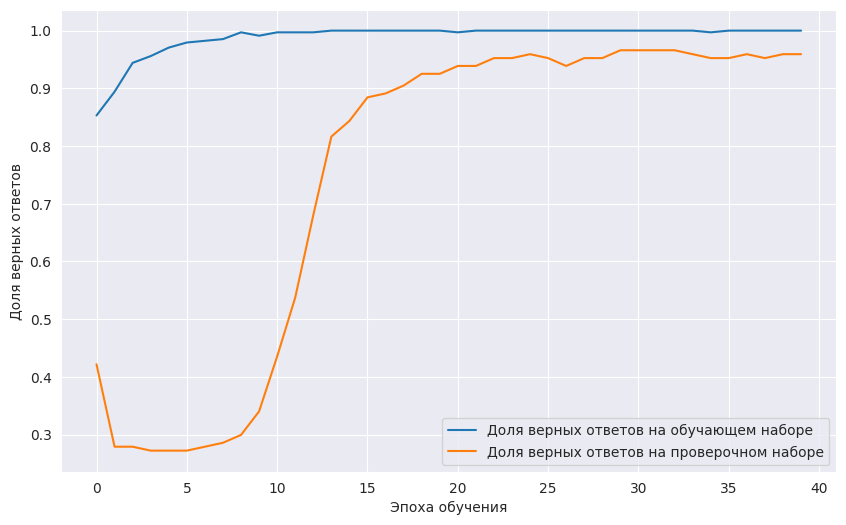





Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 batch_normalization_2 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        4128      
                                                                 
 batch_normalization_3 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                  

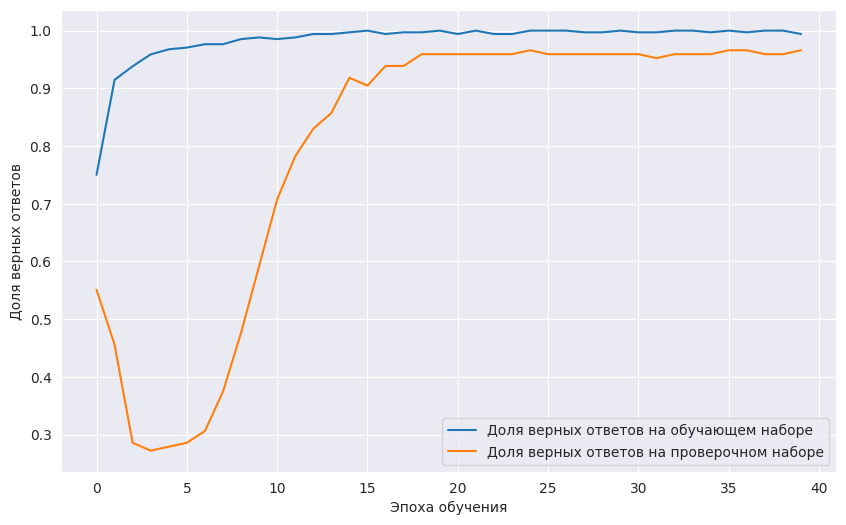





Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 batch_normalization_4 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        4128      
                                                                 
 batch_normalization_5 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                  

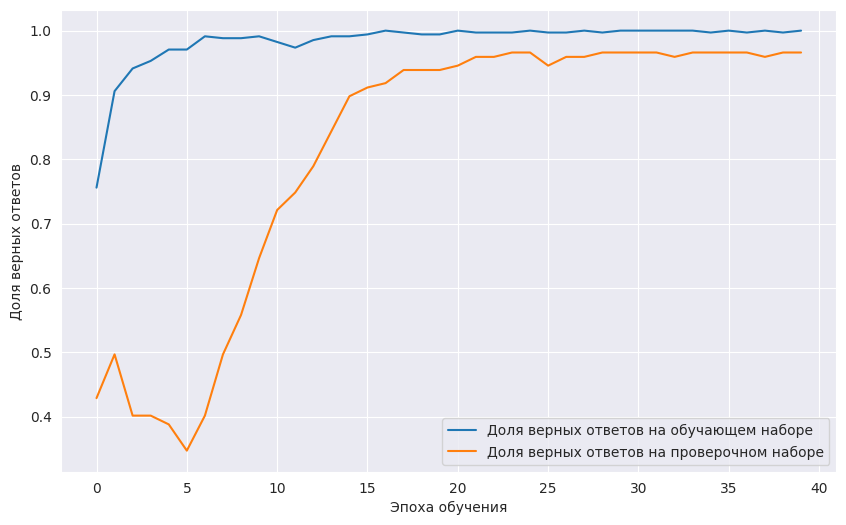





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 batch_normalization_6 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4128      
                                                                 
 batch_normalization_7 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                  

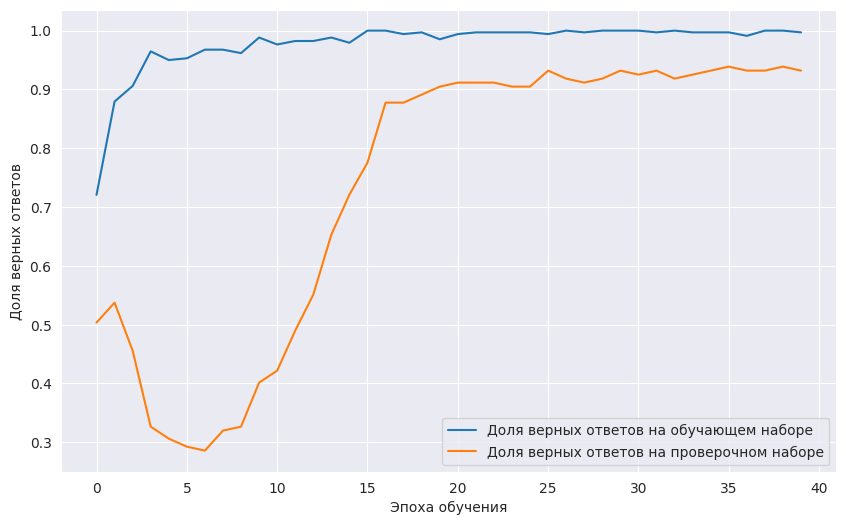





Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        416       
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 32)        4128      
                                                                 
 batch_normalization_9 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                  

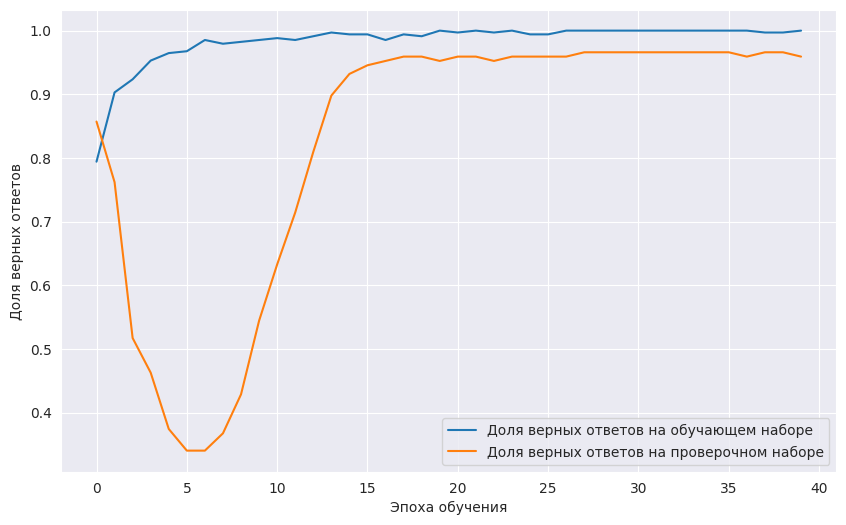

In [ ]:
# Обучение модели сверточной нейронной сети подготовленных данных
cnt = 5
history_accuracy = []
history_val_accuracy = []
for i in range(cnt):
  model = Sequential()

  model.add(Conv2D(32, (2, 2), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(32, (2, 2), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.00002), metrics=['accuracy'])
  model.summary()
  store_learning = model.fit(x_train,
                            y_train,
                            validation_data=(x_val, y_val),
                            shuffle=True,
                            batch_size=10,
                            epochs=40,
                            verbose=1)
  history_accuracy.append(store_learning.history['accuracy'])
  history_val_accuracy.append(store_learning.history['val_accuracy'])
  print(f'Обучение №{i+1} завершено. Результаты')
  print(f'Максимальная точность на обучающей выборке: {round(np.array(store_learning.history["accuracy"]).max(), 3)}')
  print(f'Максимальная точность на проверочной выборке: {round(np.array(store_learning.history["val_accuracy"]).max(), 3)}')
  plt.figure(1, figsize=(10, 6))
  plt.plot(store_learning.history['accuracy'],
          label='Доля верных ответов на обучающем наборе')
  plt.plot(store_learning.history['val_accuracy'],
          label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()
  plt.show()
  print('\n'*3)

In [ ]:
print(f'Средняя точность на обучающей выборке: {round(np.array(history_accuracy).max(axis=1).mean(), 3)}')
print(f'Максимальная точность на обучающей выборке: {round(np.array(history_accuracy).max(), 3)}')
print(f'Средняя точность на проверочной выборке: {round(np.array(history_val_accuracy).max(axis=1).mean(), 3)}')
print(f'Максимальная точность на проверочной выборке: {round(np.array(history_val_accuracy).max(), 3)}')

Средняя точность на обучающей выборке: 1.0
Максимальная точность на обучающей выборке: 1.0
Средняя точность на проверочной выборке: 0.961
Максимальная точность на проверочной выборке: 0.966
